In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split, KFold
from sklearn import metrics
import xgboost as xgb
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MatrixFactorization, MICE
from sklearn import preprocessing
import operator


Using Theano backend.


In [82]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
# train = train[train['Park_ID'] != 19]

In [92]:
print test.Park_ID.unique()
print train.Park_ID.unique()

[12 13 14 15 16 17 18 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39]
[12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39]


In [18]:
train_sorted = train.sort_values(by=[ 'Location_Type', 'Park_ID'])
train_sorted.head(50)

,ID,Park_ID,Date,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type,Footfall
12420,3311715,15,01-09-1990,191.0,35.72,60.8,15.2,64.7400,NaN,NaN,NaN,96.0,344.0,246.0,282.0,201.0,1,1410
12421,3311815,15,02-09-1990,283.0,30.40,53.2,7.6,67.2300,NaN,NaN,NaN,92.0,332.0,264.0,291.0,219.0,1,1398
12422,3311915,15,03-09-1990,289.0,40.28,60.8,15.2,9.9600,NaN,NaN,NaN,248.0,336.0,234.0,282.0,192.0,1,1366
12423,3312015,15,04-09-1990,315.0,23.56,38.0,7.6,7.4700,NaN,NaN,NaN,128.0,336.0,249.0,288.0,204.0,1,1330
12424,3312115,15,05-09-1990,195.0,26.60,45.6,7.6,0.8300,NaN,NaN,NaN,176.0,340.0,252.0,291.0,171.0,1,1383
12425,3312215,15,06-09-1990,214.0,60.80,106.4,38.0,128.6500,NaN,NaN,NaN,108.0,312.0,258.0,282.0,216.0,1,1394
12426,3312315,15,07-09-1990,253.0,48.64,76.0,38.0,19.0900,NaN,NaN,NaN,244.0,344.0,234.0,276.0,210.0,1,1417
12427,3312415,15,08-09-1990,227.0,34.20,53.2,7.6,39.8400,NaN,NaN,NaN,64.0,276.0,285.0,291.0,270.0,1,1461
12428,3312515,15,09-09-1990,147.0,9.12,15.2,0.0,12.4500,NaN,NaN,NaN,8.0,324.0,273.0,291.0,237.0,1,1386
12429,3312615,15,10-09-1990,222.0,16.72,38.0,0.0,0.0249,NaN,NaN,NaN,12.0,280.0,279.0,297.0,243.0,1,1426


In [46]:
train.isnull().sum()

ID                                  0
Park_ID                             0
Date                                0
Direction_Of_Wind                3929
Average_Breeze_Speed             3929
Max_Breeze_Speed                 3934
Min_Breeze_Speed                 3932
Var1                             8280
Average_Atmospheric_Pressure    40193
Max_Atmospheric_Pressure        40193
Min_Atmospheric_Pressure        40193
Min_Ambient_Pollution           31637
Max_Ambient_Pollution           31637
Average_Moisture_In_Park           38
Max_Moisture_In_Park               38
Min_Moisture_In_Park               38
Location_Type                       0
Footfall                            0
Month                               0
Day                                 0
Is789Day                            0
dtype: int64

In [84]:
def transform_data(data):
    #data.loc[data['Var1']>=300,'Var1'] = data[data['Var1']>=300]['Var1'].median()
    data['Date'] = pd.to_datetime(data['Date'], dayfirst = True )
    data['Month'] = data['Date'].dt.month
    # data['footfallPerMonth']= data['Month'].apply(lambda x: ffpm[x]) 
    # data['Year'] = data['Date'].dt.year
    data['Day'] = data['Date'].dt.day
    # data['footfallPerDay'] = data['Day'].apply(lambda x : ffpd[x])
    # data['Is789Day'] = (data['Day'].isin([7,8,9])).astype(int) # thoda kharaab
    # data['Is78Month'] = pd.to_numeric(data['Date'].dt.month.isin([7,8]))  # thoda kharaab
    
    # history of adding season - 124-> 127
    
    #data['Season'] =  data['Date'].dt.month.apply( lambda x: 1 if (x<=4) else 2 if (x>4 and x<=8 ) else 3)
    # data['WeekOfYear'] = data['Date'].dt.weekofyear
    # data['DayOfYear'] = data['Date'].dt.dayofyear 
    # data['WeekDay'] = data['Date'].dt.dayofweek
    # data['IsWed'] = pd.to_numeric(data['WeekDay'] == 2)
    # history - 124 -> 127 
    # data['IsFri'] = pd.to_numeric(data['WeekDay'] == 4) 
    # data['IsLeap'] = pd.to_numeric(data['Date'].dt.year %4 == 0) # isse kharaaab
    # Average Ambient Pollution bhi nikal lo
    # data['Diff_Breeze_Speed'] = data['Max_Breeze_Speed'] - data['Min_Breeze_Speed']
    
    # History - 124 se 126
    # data['Residual_Min_Breeze_Speed'] = data['Average_Breeze_Speed']-data['Min_Breeze_Speed']
    # data[data['Residual_Min_Breeze_Speed']<0]  = 0
    # data['Residual_Max_Breeze_Speed'] = data['Max_Breeze_Speed'] - data['Average_Breeze_Speed']
    # data[data['Residual_Max_Breeze_Speed']<0]  = 0
    
    # data['Diff_Atmospheric_Pressure'] = data['Max_Atmospheric_Pressure'] - data['Min_Atmospheric_Pressure']
    # data['Diff_Ambient_Pollution'] = data['Max_Ambient_Pollution'] - data['Min_Ambient_Pollution']
    # data['Average_Ambient_Pollution'] = (data['Max_Ambient_Pollution'] + data['Min_Ambient_Pollution'])/2
    # data['Diff_Moisture_In_Park'] = data['Max_Moisture_In_Park'] - data['Min_Moisture_In_Park']
    # data['Breeze_Speed'] = data['Diff_Breeze_Speed'] / data['Average_Breeze_Speed']
    # data['Atm_Pressure'] = data['Diff_Atmospheric_Pressure'] / data['Average_Atmospheric_Pressure']
    # data['Amb_Pollution'] = data['Diff_Ambient_Pollution'] / data['Average_Ambient_Pollution']
    # data['Moisture_In_Park'] = data['Diff_Moisture_In_Park'] / data['Average_Moisture_In_Park']
    # data = data.drop(labels=['Date'], axis=1) ,'Max_Ambient_Pollution','Max_Atmospheric_Pressure','Max_Breeze_Speed' ,'Max_Moisture_In_Park', 'Min_Moisture_In_Park','Min_Ambient_Pollution', 'Min_Atmospheric_Pressure', 'Min_Breeze_Speed'
    # 'Max_Atmospheric_Pressure', 'Average_Atmospheric_Pressure', 
    data = data.drop(labels=[ 'Date' , 'ID',], axis=1 )
    # data = data.drop(labels=['Diff_Breeze_Speed', 'Diff_Atmospheric_Pressure', 'Diff_Ambient_Pollution', 'Diff_Moisture_In_Park', 'Average_Moisture_In_Park', 'Average_Ambient_Pollution', 'Average_Atmospheric_Pressure', 'Average_Breeze_Speed'], axis =1)
    # data['Year'] = data['Year'] - data['Year'].min()
    columns = data.columns.values
    # data.loc[data['Direction_Of_Wind'].isnull(), 'Direction_Of_Wind'] = np.round(np.random.uniform(0,360))
    # History -> 119 se 120
    # data['Direction_Of_Wind'].fillna(np.round(np.random.uniform(0,360)), inplace=True)
    # data['Direction_Of_Wind'] = pd.cut(data['Direction_Of_Wind'], 10, labels=False)
    # data = MICE().complete(data)
    
    for col in columns:
        # fill missing data with median values # GENERIC WAY
        #data.loc[data[col].isnull(), col] = data[col].median()
        # random sampling
        # data.loc[data[col].isnull(), col] = data.loc[data[col].notnull(), col].sample( n = 1 )
        # data[col].fillna(np.random.choice(data.loc[data[col].notnull(), col]), inplace=True)
        data[col].fillna(data[col].mean(), inplace=True)
        if (col not in['Park_ID', 'Date','Location_Type', 'Season','Month', 'Day', 'WeekDay','WeekOfYear', 'Is789Day', 'Is78Month']):
            data[col] = StandardScaler().fit_transform(data[col].reshape(-1,1))
    
    # encoder  = preprocessing.LabelEncoder()
    # data['Park_ID'] = encoder.fit_transform(data['Park_ID'].reshape(-1,1))
    # data['Location_Type'] =encoder.fit_transform(data['Location_Type'].reshape(-1,1))
    #  'Direction_Of_Wind', 'Season','Month', 'Day', 'WeekDay','WeekOfYear' 
    # dummy_columns = ['Location_Type']
    #     data = data.drop(labels=['Park_ID', 'Location_Type'], axis = 1)
    # data = pd.get_dummies(data, columns= dummy_columns)
    # data = data.drop(labels=['Park_ID'], axis = 1)
    
    return data;

In [85]:
# df = train
# df= df.drop(labels='Footfall', axis=1)
# df= df.append(test, ignore_index=True)
# df = df.drop('ID', axis=1)

# print (train.shape, test.shape, df.shape)
# df = carryForwardImputation(df)
# df = transform_data(df) 
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
train = train[train['Park_ID'] != 19]

df = train
df= df.drop(labels='Footfall', axis=1)
df= df.append(test, ignore_index=True)
# df = df.drop('ID', axis=1)

print (train.shape, test.shape, df.shape)
# df = carryForwardImputation(df)
df = transform_data(df) 


# df_train_data = transform_data(train)
# df_train_data= df_train_data.drop(labels='Footfall', axis=1)

# print (train.shape, test.shape) 
df_train_data = df.ix[0:train.shape[0]-1,]
df_train_labels = train['Footfall']
df_test_data = df.ix[train.shape[0]:df.shape[0],]
# df_test_data = transform_data(test)
target = 'Footfall'
print (df_train_data.shape, df_test_data.shape, df_train_labels.shape)

((111538, 18), (39420, 17), (150958, 17))
((111538, 17), (39420, 17), (111538,))


In [72]:
df_train_data.head()

,Park_ID,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type,Month,Day
0,12,0.089150,0.163042,0.406286,-0.155541,2.009873,-1.659854,-1.609858,-1.370434,-0.958846,-0.115230,0.262466,0.246272,0.450822,3,9,1
1,12,1.101257,-0.101537,0.406286,-0.689292,-0.124505,-1.550979,-1.262484,-1.457184,0.074553,0.775654,0.156565,0.823978,0.054624,3,9,2
2,12,1.479407,0.515816,0.406286,-0.155541,0.465855,-0.166702,-0.021864,-0.329436,0.901272,-0.497038,-1.008345,-0.331433,-0.803806,3,9,3
3,12,1.234722,-0.498407,-0.637732,-0.689292,-0.509828,0.735410,0.656341,0.754938,1.366302,0.521116,-0.796543,-1.486844,-0.209508,3,9,4
4,12,0.233736,-0.322021,-0.289726,-0.689292,-0.487804,0.626535,0.606716,0.422396,0.901272,0.775654,-0.478841,-0.716570,-0.407608,3,9,5


In [61]:
def carryForwardImputation(trainData):
    impTrainData = trainData.copy()
    isNullPresentInCol = [ key for key, val in trainData.isnull().sum().iteritems() if val != 0]
    # print isNullPresentInCol
    # print '>>>>', impTrainData['Direction_Of_Wind'][840]

    for colName in isNullPresentInCol:
        nullValIdxs = trainData[colName].index[trainData[colName].apply(np.isnan)]
        length = len(nullValIdxs)
        # print nullValIdxs
        #imputing the first missing value.
        i = 0
        while i<length:
            startInd = i
            while (i+1)<length and nullValIdxs[i]+1 == nullValIdxs[i+1]:
                i += 1
            if nullValIdxs[startInd]!=0 and nullValIdxs[i] != len(trainData.index)-1:
                firstVal = trainData[colName][nullValIdxs[startInd]-1]
                lastVal = trainData[colName][nullValIdxs[i]+1]
                incVal = (lastVal - firstVal)/(i-startInd+1)
                for j in xrange(i-startInd+1):
                    impTrainData[colName][nullValIdxs[startInd+j]] = firstVal + (j+1)*incVal
                    
            i += 1
    # print '<<<', impTrainData['Direction_Of_Wind'][840]
    return impTrainData

In [16]:
param_grid_ = {
                'max_depth': [3, 5, 7, 10],
                'n_estimators' : [100, 250, 500],
                'learning_rate' : [0.1, 0.05, 0.01]
}
# gridSearch_rmse_, gridSearch_score_, bestEstimator_ = apply_grid_search(xgb.XGBRegressor(), param_grid_, df_train_data, df_train_labels)


In [76]:
data = df_train_data
labels = df_train_labels
# params = bestEstimator_.get_params()
params = {
            'max_depth' : 10, 
            'n_estimators' : 1000,
            'learning_rate' : 0.1
}
result_rmse = []
cv = KFold(len(data), n_folds=2, shuffle=False, random_state=None)
#gb1 = GradientBoostingRegressor( n_estimators = 200, max_depth = 10, learning_rate = 0.01) #BestTillNow 
gb1 = xgb.XGBRegressor(**params)
#gb1 = SVR(epsilon = 0.2)
# gb1 = RandomForestRegressor(n_estimators = 1000, max_depth =10)
# gb1 = ExtraTreesRegressor(n_estimators=1000, criterion='mse', max_depth=10, min_samples_split=5, min_samples_leaf=10, n_jobs=-1, random_state=42)
for trainindex, testindex in cv:
    randomindexs = np.random.permutation(len(data))
    data = data.iloc[randomindexs]
    labels = labels.iloc[randomindexs]
    train_data = data.iloc[trainindex]
    train_labels = labels.iloc[trainindex]
    tr_test_data = data.iloc[testindex]
    tr_test_labels = labels.iloc[testindex]

    gb1.fit(train_data, train_labels)
    predicted_labels = gb1.predict(tr_test_data)
    rmse= np.sqrt(metrics.mean_squared_error(tr_test_labels, predicted_labels))
    result_rmse.append(rmse)
    print "rmse = ",rmse

# print (result_rmse)
print ('mean rmse: ', np.mean(result_rmse))


rmse =  67.7064018921
rmse =  67.5852485307
('mean rmse: ', 67.645825211427095)


In [55]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split( df_train_data, df_train_labels, test_size=0.3, random_state=42) 
gb1 = xgb.XGBRegressor(max_depth=10, learning_rate=0.1, n_estimators = 1000)
#gb1 = GradientBoostingRegressor( n_estimators = 500, max_depth = 10, learning_rate = 0.01)
gb1.fit(X_train, y_train)
predicted_labels = gb1.predict(X_test)
rmse= np.sqrt(metrics.mean_squared_error(y_test, predicted_labels))
print rmse

68.8205267347


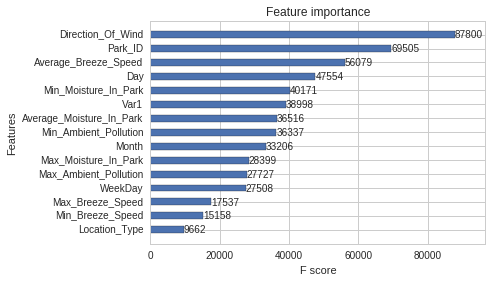

In [121]:
fig = plt.figure(figsize=(20, 10))
fig = xgb.plot_importance(gb1, height=0.5)

In [86]:
# xgb_params = {
#     "objective": "reg:linear", 
#     "min_child_weight" : 15,  
#     "eta": 0.1, 
#     "max_depth": 10, 
#     "seed": 42, 
#     "silent": 0,
#     "early_stopping_rounds" : 15
# }
# num_rounds = 1000
# dtrain = xgb.DMatrix(df_train_data, label=df_train_labels)
# gbdt = xgb.train(xgb_params, dtrain, num_rounds)

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y, yhat)

def rmspe(y, yhat):
    return np.sqrt(np.mean(((y - yhat)/y) ** 2))



params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.1,
          "max_depth": 10,
          "subsample": 0.85,
          "colsample_bytree": 0.4,
          "min_child_weight": 10,
          "silent": 1,
          "thread": 1,
          "seed": 1301
          }
num_boost_round = 1200

X_train, X_test, y_train, y_test = train_test_split( df_train_data, df_train_labels, test_size=0.3, random_state=42) 
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# y_train_log = (y_train)
# y_test_log = (y_test)


dtrain = xgb.DMatrix(X_train, y_train_log)
dvalid = xgb.DMatrix(X_test, y_test_log)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=30, feval = rmspe_xg, verbose_eval=True)

print("Validating")
predicted_labels = gbm.predict(xgb.DMatrix(X_test))
#error = np.sqrt(metrics.mean_squared_error(y_test, predicted_labels))
error = rmspe(y_test, np.expm1(predicted_labels))
print('RMSE: {:.6f}'.format(error))


[0]	train-rmspe:0.998098	eval-rmspe:0.998101
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 30 rounds.
[1]	train-rmspe:0.995878	eval-rmspe:0.995882
[2]	train-rmspe:0.992374	eval-rmspe:0.992381
[3]	train-rmspe:0.98719	eval-rmspe:0.9872
[4]	train-rmspe:0.979825	eval-rmspe:0.97984
[5]	train-rmspe:0.96992	eval-rmspe:0.969939
[6]	train-rmspe:0.957014	eval-rmspe:0.957038
[7]	train-rmspe:0.94094	eval-rmspe:0.940964
[8]	train-rmspe:0.921497	eval-rmspe:0.921514
[9]	train-rmspe:0.89864	eval-rmspe:0.89865
[10]	train-rmspe:0.872396	eval-rmspe:0.872406
[11]	train-rmspe:0.843068	eval-rmspe:0.843077
[12]	train-rmspe:0.811024	eval-rmspe:0.811029
[13]	train-rmspe:0.776701	eval-rmspe:0.776705
[14]	train-rmspe:0.740556	eval-rmspe:0.740556
[15]	train-rmspe:0.703272	eval-rmspe:0.703234
[16]	train-rmspe:0.66507	eval-rmspe:0.66503
[17]	train-rmspe:0.626589	eval-rmspe:0.626528
[18]	train-rmspe:0.588316	eval-rmspe:0.588217
[

In [54]:
def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1

    outfile.close()


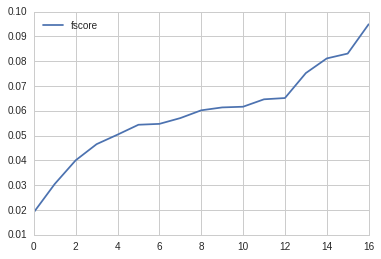

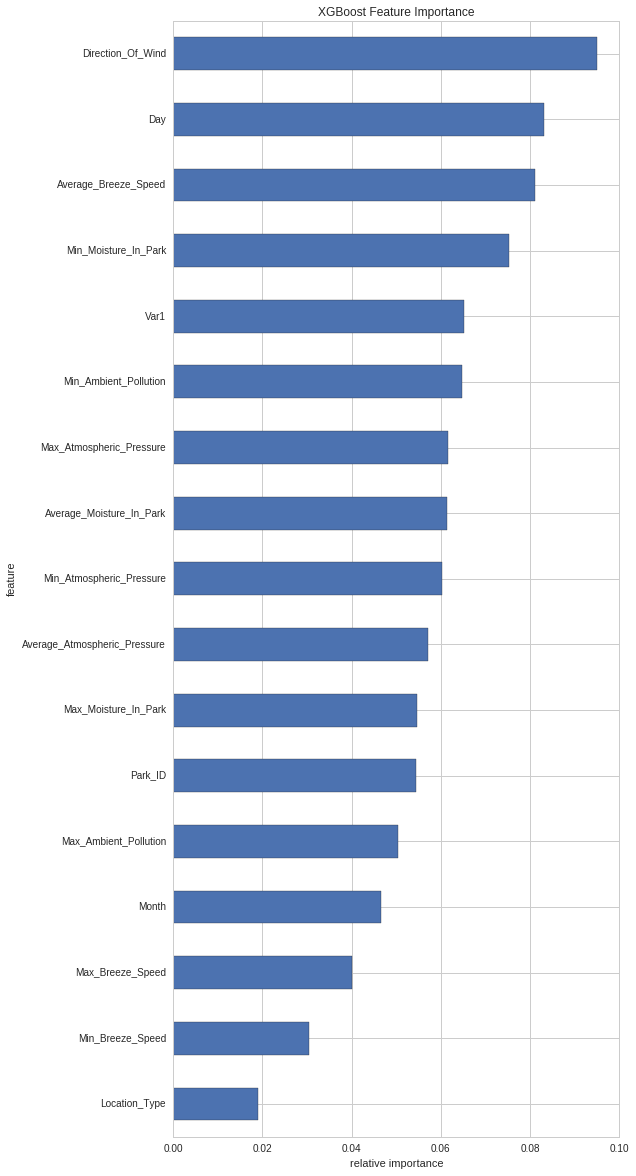

In [82]:
ceate_feature_map(df_train_data.columns.values)
importance = gbm.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(8, 20))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')


In [77]:
predictions = pd.DataFrame(gb1.predict(df_test_data))
results = pd.DataFrame();
results['ID'] = test['ID']
results['Footfall'] = np.round(predictions)
timestr = time.strftime("%Y%m%d-%H%M%S")
results.to_csv('submission' + timestr + ".csv", index=False)

In [88]:
predictions = pd.DataFrame(np.expm1(gbm.predict(xgb.DMatrix(df_test_data))))
results = pd.DataFrame();
results['ID'] = test['ID']
results['Footfall'] = np.round(predictions)
timestr = time.strftime("%Y%m%d-%H%M%S")
results.to_csv('submission' + timestr + ".csv", index=False)